# Regression - Small Dataset - NO Feature Engineering: diabetes.csv 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df = pd.read_csv('C:/Users/Nada Abbas/Desktop/Folder for all/Epsilon AI Diploma/dastasets/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


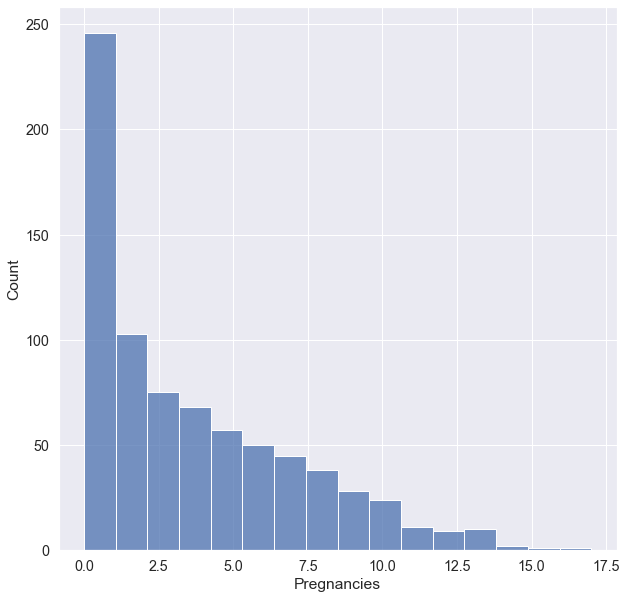

In [9]:
sns.histplot(df['Pregnancies'])

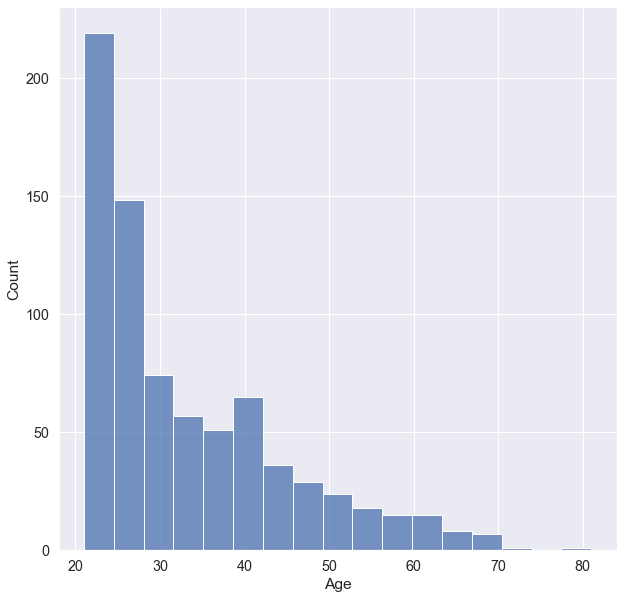

In [10]:
sns.histplot(df['Age'])

In [27]:
from sklearn.model_selection import train_test_split

Y = df['Glucose']
X = df.drop(['Glucose'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=150)

## 1- Gradiend Descend: Logistic Regression:

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_pred = linReg.predict(x_test)

print(f'Training Score: {linReg.score(x_train, y_train)}')
print(f'Test Score: {linReg.score(x_test, y_test)}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')

print(f'coefficients: {linReg.coef_}')
print(f'b (interception): {linReg.intercept_}')
pd.DataFrame(linReg.coef_, X.columns, columns=["Coeff"])  # highest score - lower RMSE than SVM-linear

Training Score: 0.3500144988594712
Test Score: 0.3184635275199229
Root Mean Square Error: 26.151423068323158
coefficients: [-0.416354    0.0528283  -0.26766863  0.09291421  0.35026154  2.21755334
  0.45248332 24.93124127]
b (interception): 80.71414989451662


,Coeff
Pregnancies,-0.416354
BloodPressure,0.052828
SkinThickness,-0.267669
Insulin,0.092914
BMI,0.350262
DiabetesPedigreeFunction,2.217553
Age,0.452483
Outcome,24.931241


## 2- Gradient Descent: Polynomial Regression:

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

linReg.fit(x_train_poly, y_train)
y_pred = linReg.predict(x_test_poly)

print(f'Training Score: {linReg.score(x_train_poly, y_train)}')
print(f'Test Score: {linReg.score(x_test_poly, y_test)}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  # hoa ezay l score ykon bel -ve asln ??
                                          # Lower value of error than linear regression

Training Score: 0.557395374345681
Test Score: -0.12434809986544204
Root Mean Square Error: 33.589316818857554


## 3- Gradient Descent: SVM - Linear: 

In [30]:
from sklearn.svm import SVR

svm = SVR(kernel='linear') # select linear kernel since the distribution of datapoints is linear
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  # the best output relating to the RMSE still the scores are very low

Training Score: 0.32994381934093
Test Score: 0.29175569856861194
Root Mean Square Error: 26.658905795815212


## 4- Gradient Descent: SVM - Polynomial:

In [25]:
svm = SVR(kernel='poly') 
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test) # very slow model

print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  # lower RMSE and lower accuracy

Training Score: 0.036068452789494776
Test Score: 0.07309056424162597
Root Mean Square Error: 19.252358727954018


## 5- Decision Tree:

In [31]:
from sklearn.tree import DecisionTreeRegressor

DecTree = DecisionTreeRegressor()
DecTree.fit(x_train, y_train)
y_pred = DecTree.predict(x_test)

print(f'Training Score: {DecTree.score(x_train, y_train)}')
print(f'Test Score: {DecTree.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}') # a great example of over fitting

Training Score: 1.0
Test Score: -0.5720760530017617
Root Mean Square Error: 39.71801648286748


# Select Linear Regression in this case